# Let's make a web scraper!

## Goals: 
- Get data from a few websites, perhaps 100 images first, with the surrounding context (closest tag to them, class names, image names, parent tag, closest p for textual context and how far it is perhaps?)

## How to:
- Collect website names, just go for random 50 websites
- Scrape them, analyze (wholly)
- Decide which parts to take
- Compile to json

## To do:
- Compile a list of websites with a more diverse role
- Scrape parent tag
- Scrape textual content
- Compile to JSON or smth else

In [5]:
%pip install requests beautifulsoup4 matplotlib numpy pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Open ./website_url_data/builtwith-top1m-20240621.csv and read all the URLs
import pandas as pd
df = pd.read_csv('./website_url_data/builtwith-top1m-20240621.csv')
websites = df['url'].tolist()

# Append http:// to each URL
websites = ['http://' + url for url in websites]

# Print the first 5 URLs
print(websites[:5])

['http://trendmicro.com', 'http://samsung.com', 'http://vmware.com', 'http://cisco.com', 'http://honeywell.com']


In [5]:
# Function to label image manually

import requests
from urllib.parse import urljoin
from io import BytesIO
import requests
import matplotlib.pyplot as plt
from PIL import Image


def label_image(image_url, image_alt):
    # Download the image
    image_res = requests.get(image_url)
    # Display the image
    image = Image.open(BytesIO(image_res.content))
    plt.imshow(image)
    plt.title(f'Current alt: {image_alt}')
    plt.axis("off")
    # Set bg color to gray
    ax = plt.gca()
    ax.set_facecolor('gray')
    plt.show()
    # Manually label the data
    # 1. Role
    #   1: Informative (images that graphically represent concepts and information, typically pictures, photos, and illustrations.)
    #   2: Decorative (the only purpose of an image is to add visual decoration to the page)
    #   3: Functional (image used as a link or as a button, should describe the functionality of the link or button rather than the visual image)
    #   4: Text (readable text)
    #   5: Complex (diagrams or graphs)
    role = input("Role of image (1-5): ")
    # A shortcut to skip the image, input '0' for role
    if (role == '0'):
        return None
    # A shortcut to cut the loop, input 'q' for role
    if (role == 'q'):
        return 'q'
    
    # 2. New alt text, if previous alt text is not descriptive enough
    new_alt = input("New alt text: ")

    # 3. If the image has a readable text, input the text
    text = input("Text in image (if any): ")

    # 4. If the image has a known entity, input the entity
    entity = input("Entity in image (if any, comma separated): ")

    # Parse the data
    if (role == '1'):
        role = 'informative'
    elif (role == '2'):
        role = 'decorative'
    elif (role == '3'):
        role = 'functional'
    elif (role == '4'):
        role = 'text'
    elif (role == '5'):
        role = 'complex'
    else:
        role = 'unknown'

    if (new_alt == ''):
        new_alt = image_alt

    entity = entity.split(',')

    data = {
        'role': role,
        'alt': new_alt,
    }

    return (data)

Image 57 of 126, website 2 of 1000000
Previous siblings:  [<source media="(min-width:1366px)" srcset="//images.samsung.com/is/image/samsung/assets/id/2407/home/HOME_B6Q6_Main-KV_1440x640_pc_preview.jpg?imwidth=1366, //images.samsung.com/is/image/samsung/assets/id/2407/home/HOME_B6Q6_Main-KV_1440x640_pc_preview.jpg?imwidth=2560 1.5x"/>, <source media="(min-width:768px) and (max-width:1365px)" srcset="//images.samsung.com/is/image/samsung/assets/id/2407/home/HOME_B6Q6_Main-KV_1440x640_pc_preview.jpg?imwidth=768, //images.samsung.com/is/image/samsung/assets/id/2407/home/HOME_B6Q6_Main-KV_1440x640_pc_preview.jpg?imwidth=1536 1.5x"/>, <source media="(max-width:767px)" srcset="//images.samsung.com/is/image/samsung/assets/id/2407/home/HOME_B6Q6_Main-KV_720x1080_mo_preview.jpg?imwidth=360, //images.samsung.com/is/image/samsung/assets/id/2407/home/HOME_B6Q6_Main-KV_720x1080_mo_preview.jpg?imwidth=720 1.5x"/>]
Next siblings:  []
Previous siblings:  [<source media="(min-width:1366px)" srcset="//i

[769987:770000:0726/013223.019387:ERROR:ssl_client_socket_impl.cc(879)] handshake failed; returned -1, SSL error code 1, net_error -200
[769987:770000:0726/013224.625614:ERROR:ssl_client_socket_impl.cc(879)] handshake failed; returned -1, SSL error code 1, net_error -200
[769946:769972:0726/013224.717882:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[769946:769972:0726/013224.717911:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[769946:769972:0726/013224.717917:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory


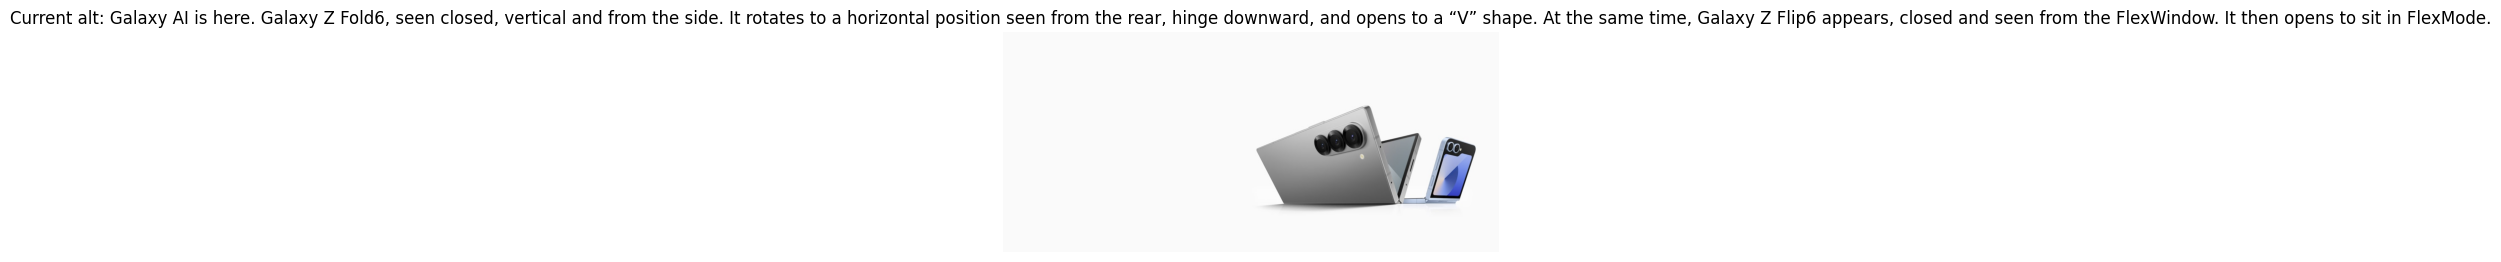

[769946:769972:0726/013252.749825:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[769946:769972:0726/013252.749882:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[769946:769972:0726/013252.749952:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[769946:769972:0726/013258.202541:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[769946:769972:0726/013258.202572:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[769946:769972:0726/013258.202579:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[769946:769972:0726/013326.217864:ERROR:bus.cc(407)] Faile

FileNotFoundError: [Errno 2] No such file or directory: './output/http://samsung.com.json'

[769946:769972:0726/013902.390840:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[769946:769972:0726/013902.390869:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[769946:769972:0726/013902.390875:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[769946:769972:0726/013907.844904:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[769946:769972:0726/013907.844981:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[769946:769972:0726/013907.844998:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[769946:769972:0726/013935.926793:ERROR:bus.cc(407)] Faile

In [8]:
import requests
from bs4 import BeautifulSoup
import json
from IPython.display import clear_output
import webbrowser

i_website = 1
for URL in websites:
    # Open the URL in a new tab for reference while labelling
    webbrowser.open_new_tab(URL)
    # Skip website?
    skip = input("Skip website? (input anything to skip): ")
    if skip == 'q':
        break
    if skip:
        i_website += 1
        continue

    # Initialize the list to store the image data
    images_info = []
    # Get the HTML content of the page
    page = requests.get(URL)
    # Parse the HTML content
    soup = BeautifulSoup(page.content, "html.parser")
    # Find all 'img' tags
    images = soup.find_all("img")
    # Remove duplicates
    images = set(images)


    i_image = 1
    for image in images:
        try:
            # GET RELEVANT DATA OF THE IMAGE
            # Clear the output before displaying the next image to avoid an overly big notebook size
            clear_output(wait=True)
            print(f"Image {i_image} of {len(images)}, website {i_website} of {len(websites)}")
            # The 'src' attribute of the image
            image_url = image["src"]
            # Relative path handling
            if not image_url.startswith(('http://', 'https://')):
                image_url = urljoin(URL, image_url)
            # The 'alt' attribute of the image
            image_alt = image.get("alt", "No alt attribute")  # Use a default value if 'alt' is missing
            # The other attributes of the image
            image_attrs = image.attrs
            # Find out if image has <a> parent or <button> parent, potentially indicating a functional image
            # a_parent_found = False
            # # Loop up to 6 levels up the hierarchy
            # for _ in range(6):
            #     # Try to find a parent <a> tag
            #     a_parent = current_tag.find_parent('a')
            #     if a_parent:
            #         # If an <a> parent is found, set the flag to True and break the loop
            #         a_parent_found = True
            #         break
            #     else:
            #         # If not found, move up to the next parent
            #         current_tag = current_tag.parent
            #         # If the current tag is None (top of the tree), break the loop
            #         if current_tag is None:
            #             break

            # Extract sibling tags of the image
            previous_siblings = [sibling for sibling in image.find_previous_siblings()]
            next_siblings = [sibling for sibling in image.find_next_siblings()]
            print("Previous siblings: ", previous_siblings)
            print("Next siblings: ", next_siblings)

            # If no siblings found, possibly the image is wrapped in a parent tag related to the image (srcset, sizes, a div wrapper, link, etc.)
            # In this case, we can extract the parent tag and its siblings. This process is repeated until we find a sibling.
            if not previous_siblings and not next_siblings:
                current_tag = image
                for _ in range(5):
                    current_tag = current_tag.parent
                    if current_tag:
                        previous_siblings = [sibling for sibling in current_tag.find_previous_siblings()]
                        next_siblings = [sibling for sibling in current_tag.find_next_siblings()]
                        if previous_siblings or next_siblings:
                            break

            print("Previous siblings: ", previous_siblings)
            print("Next siblings: ", next_siblings)

            # Find nearest text to the image
            # TODO
            nearest_text = image.find_next(string=True)
            if nearest_text:
                nearest_text = nearest_text.strip()
            print("Nearest text: ", nearest_text)

            # While the next element is still a text, append it to the nearest text
            # TODO
            next_text = nearest_text
            next_element = image.find_next()
            while next_element and next_element.name == None:
                next_text += next_element.string.strip()
                next_element = next_element.find_next()

            # LABELLING
            # Label the image manually
            data = label_image(image_url, image_alt)
            if data == 'q':
                break
            # Write the data (image and labels) to a file
            if data is not None:
                images_info.append({
                    "src": image_url,
                    "role": data['role'],
                    "alt": data['alt'],
                    "attrs": image_attrs,
                })
            
        except KeyError:
            pass  # Skip images without 'src' or 'alt'
        except requests.exceptions.MissingSchema:
            pass  # Skip URLs without a schema
        except Exception as e:
            print(f"An error occurred: {e}")

        i_image += 1

    # Step 4: Write the list to a file in JSON format
    with open(f"./output/{URL}.json", "w") as f:
        json.dump(images_info, f, indent=4)

    i_website += 1

# Create the AI

In [2]:
# installing some dependencies, CLIP was released in PyTorch
import subprocess

# CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
# print("CUDA version:", CUDA_version)

# if CUDA_version == "10.0":
#     torch_version_suffix = "+cu100"
# elif CUDA_version == "10.1":
#     torch_version_suffix = "+cu101"
# elif CUDA_version == "10.2":
#     torch_version_suffix = ""
# else:
#     torch_version_suffix = "+cu110"

%pip install torch==1.7.1+cpu torchvision==0.8.2+cpu -f https://download.pytorch.org/whl/torch_stable.html

import numpy as np
import torch

print("Torch version:", torch.__version__)

Defaulting to user installation because normal site-packages is not writeable
Looking in links: https://download.pytorch.org/whl/torch_stable.html
DEPRECATION: The HTML index page being used (https://download.pytorch.org/whl/torch_stable.html) is not a proper HTML 5 document. This is in violation of PEP 503 which requires these pages to be well-formed HTML 5 documents. Please reach out to the owners of this index page, and ask them to update this index page to a valid HTML 5 document. pip 22.2 will enforce this behaviour change. Discussion can be found at https://github.com/pypa/pip/issues/10825
ERROR: Could not find a version that satisfies the requirement torch==1.7.1+cpu (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.1

In [6]:
%pip install gdown ftfy regex

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 KB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
# clone the CLIP repository
!git clone https://github.com/openai/CLIP.git

import sys
from pathlib import Path

clip_dir = Path(".").absolute() / "CLIP"
sys.path.append(str(clip_dir))
print(f"CLIP dir is: {clip_dir}")

import clip

fatal: destination path 'CLIP' already exists and is not an empty directory.
CLIP dir is: /home/felinejtd/projects/itb/ta/image-alt-text-ai/CLIP


In [9]:
# Load pre-trained model
import os

device = "cuda" if torch.cuda.is_available() else "cpu"
model, transform = clip.load("ViT-B/32", device=device)
print(f"Model dir: {os.path.expanduser('~/.cache/clip')}")

Model dir: /home/felinejtd/.cache/clip
